# 😊 Simple Sentiment Analyzer

Build a tool that reads customer reviews and tells you if people are happy, angry, or neutral about products!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from collections import Counter
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries loaded successfully!")
print("🎯 Ready to analyze customer sentiments!")

📚 All libraries loaded successfully!
🎯 Ready to analyze customer sentiments!


In [2]:
sample_reviews = [
    "This restaurant is absolutely amazing! The food was incredible and service was perfect.",
    "Worst experience ever. Food was cold and waiter was rude. Never coming back.",
    "The pizza was okay, nothing special but not bad either.",
    "Love this place! Best burgers in town and staff is so friendly.",
    "Terrible service, waited 2 hours for our order. Very disappointed.",
    "Great atmosphere and delicious food. Highly recommend!",
    "Food was decent, prices are reasonable. Average experience overall.",
    "Outstanding restaurant! Everything was perfect from start to finish.",
    "Not impressed. Food was bland and overpriced for what you get.",
    "Excellent service and amazing pasta. Will definitely visit again!",
    "The place is fine, nothing to complain about but nothing exciting.",
    "Horrible experience. Kitchen was dirty and food tasted awful.",
    "Really good food and nice ambiance. Had a great time here.",
    "Service was slow but food was tasty. Mixed feelings about this place.",
    "Fantastic restaurant! Every dish was cooked to perfection.",
    "Overpriced and underwhelming. Expected much better for this price.",
    "Decent food, friendly staff. Good option for family dinner.",
    "Absolutely terrible! Rude staff and disgusting food quality.",
    "Amazing experience! Best Italian food I've had in years.",
    "Food was alright, service could be better. Average restaurant.",
    "Incredible flavors and beautiful presentation. Loved everything!",
    "Very disappointing. Food arrived late and was completely cold.",
    "Nice restaurant with good food. Pleasant evening out.",
    "Awful experience from start to finish. Would not recommend.",
    "Excellent food quality and wonderful atmosphere. Perfect date spot!",
    "Food was okay but nothing memorable. Standard restaurant experience.",
    "Disgusting food and terrible service. Waste of money.",
    "Great value for money! Delicious food and quick service.",
    "The restaurant is fine, staff is polite. Nothing extraordinary.",
    "Best dining experience ever! Everything exceeded expectations.",
    "Poor quality food and rude waitstaff. Very unpleasant visit.",
    "Good food and reasonable prices. Satisfied with our meal.",
    "Terrible management and cold food. Completely ruined our evening.",
    "Wonderful restaurant! Fresh ingredients and skilled chefs.",
    "Average food, average service. Nothing special about this place.",
    "Fantastic menu and excellent preparation. Highly recommend this place!",
    "Not worth the money. Food was tasteless and service was poor.",
    "Great restaurant with consistent quality. Always enjoy dining here.",
    "Disappointing experience. High expectations but poor delivery.",
    "Perfect restaurant for special occasions! Amazing food and service.",
    "Food was decent enough. Not the best but certainly not the worst.",
    "Horrible atmosphere and mediocre food. Won't be returning.",
    "Excellent choice for dinner! Fresh seafood and attentive staff.",
    "Restaurant is okay. Food is acceptable, service is standard.",
    "Outstanding culinary experience! Every bite was absolutely delicious.",
    "Very poor service and overcooked food. Definitely not coming back.",
    "Nice place with good ambiance. Food quality is consistently good.",
    "Terrible experience overall. Food was inedible and staff was unprofessional.",
    "Amazing restaurant! Creative dishes and exceptional presentation.",
    "Standard restaurant experience. Nothing bad but nothing great either."
]

print(f"📝 Created {len(sample_reviews)} sample restaurant reviews")
print("🍽️ Mix of positive, negative, and neutral customer feedback")

📝 Created 50 sample restaurant reviews
🍽️ Mix of positive, negative, and neutral customer feedback


In [3]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    if polarity > 0.1:
        return "Positive", polarity
    elif polarity < -0.1:
        return "Negative", polarity
    else:
        return "Neutral", polarity

print("🔄 Analyzing sentiment for all reviews...")

results = []
for i, review in enumerate(sample_reviews, 1):
    sentiment, score = analyze_sentiment(review)
    results.append({
        'Review_ID': i,
        'Review': review,
        'Sentiment': sentiment,
        'Score': score
    })
    
df = pd.DataFrame(results)

print(f"✅ Analysis complete! Processed {len(df)} reviews")
print("\n📊 Sample results:")
print(df[['Review_ID', 'Sentiment', 'Score']].head(10))

🔄 Analyzing sentiment for all reviews...
✅ Analysis complete! Processed 50 reviews

📊 Sample results:
   Review_ID Sentiment     Score
0          1  Positive  0.883333
1          2  Negative -0.475000
2          3  Positive  0.402381
3          4  Positive  0.666667
4          5  Negative -0.987500
5          6  Positive  0.666667
6          7   Neutral  0.054167
7          8  Positive  0.812500
8          9  Negative -0.333333
9         10  Positive  0.533333


📈 SENTIMENT ANALYSIS RESULTS
😊 Positive: 30 reviews (60.0%)
😠 Negative: 16 reviews (32.0%)
😐 Neutral: 4 reviews (8.0%)

📊 Total Reviews Analyzed: 50


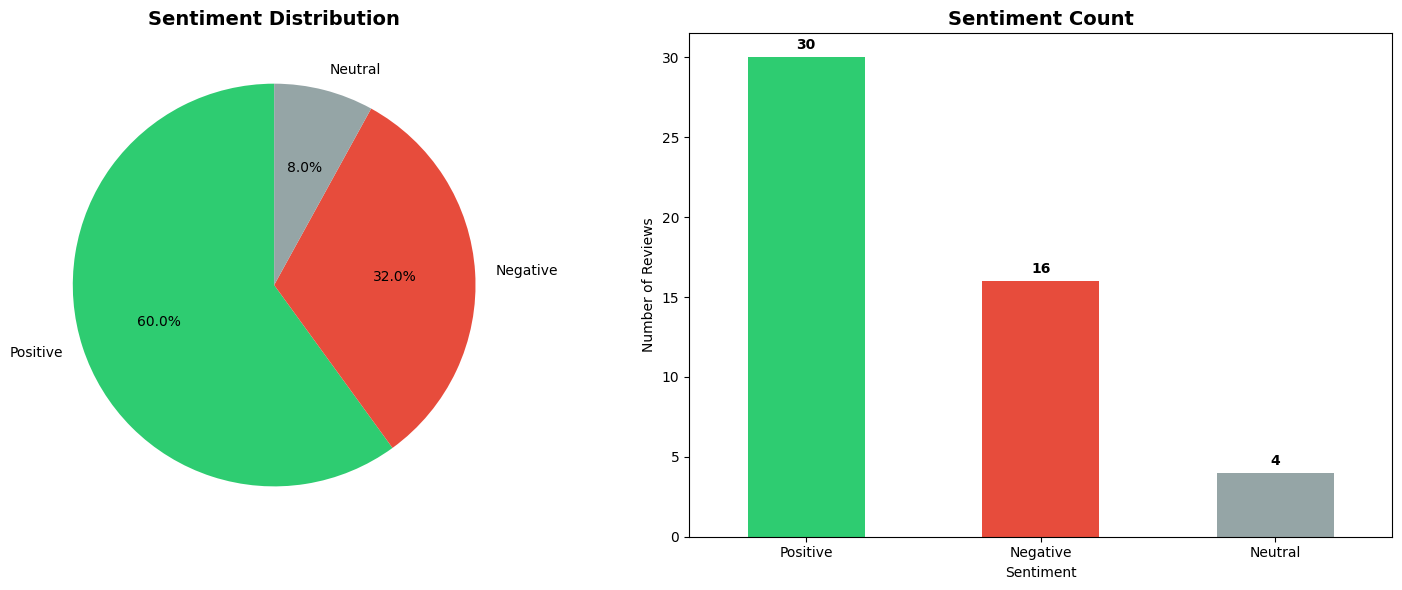

In [4]:
sentiment_counts = df['Sentiment'].value_counts()
total_reviews = len(df)

print("📈 SENTIMENT ANALYSIS RESULTS")
print("=" * 40)

for sentiment, count in sentiment_counts.items():
    percentage = (count / total_reviews) * 100
    emoji = "😊" if sentiment == "Positive" else "😠" if sentiment == "Negative" else "😐"
    print(f"{emoji} {sentiment}: {count} reviews ({percentage:.1f}%)")

print(f"\n📊 Total Reviews Analyzed: {total_reviews}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#2ecc71', '#e74c3c', '#95a5a6']  
sentiment_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

sentiment_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Sentiment Count', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Reviews')
ax2.set_xlabel('Sentiment')
ax2.tick_params(axis='x', rotation=0)

for i, v in enumerate(sentiment_counts.values):
    ax2.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

🔍 WORD ANALYSIS

😊 Top Positive Words:
   'food': 14 times
   'restaurant': 12 times
   'service': 6 times
   'good': 6 times
   'amazing': 5 times
   'nothing': 5 times
   'perfect': 4 times
   'place': 4 times
   'staff': 4 times
   'great': 4 times

😠 Top Negative Words:
   'food': 13 times
   'experience': 5 times
   'terrible': 5 times
   'service': 5 times
   'poor': 4 times
   'cold': 3 times
   'rude': 3 times
   'coming': 2 times
   'back': 2 times
   'horrible': 2 times


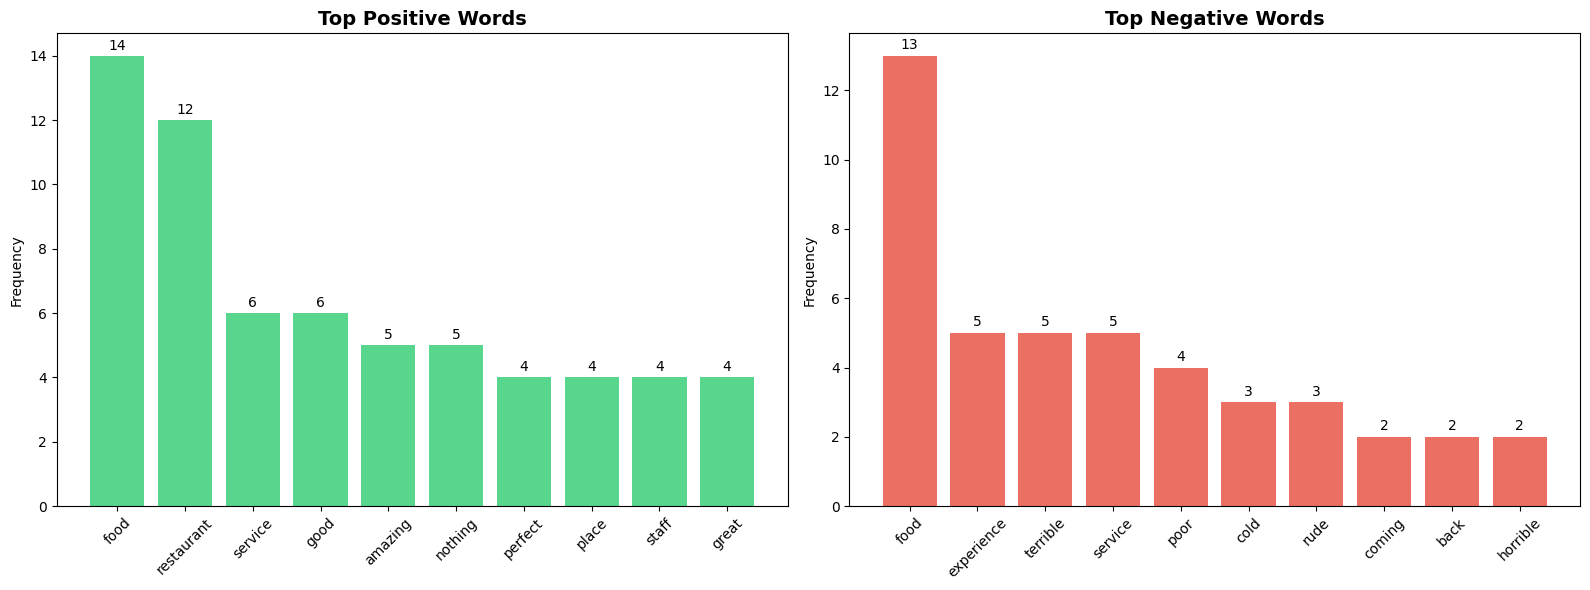

In [5]:
def extract_words(reviews, sentiment_type):
    all_words = []
    for review in reviews:
        words = review.lower().replace(',', '').replace('.', '').replace('!', '').split()
        common_words = ['the', 'and', 'was', 'is', 'a', 'an', 'to', 'for', 'of', 'in', 'on', 'with', 'this', 'that', 'but', 'not', 'had', 'have', 'has', 'we', 'our', 'i', 'it', 'very']
        filtered_words = [word for word in words if len(word) > 2 and word not in common_words]
        all_words.extend(filtered_words)
    return Counter(all_words).most_common(10)

positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].tolist()
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].tolist()

top_positive_words = extract_words(positive_reviews, 'Positive')
top_negative_words = extract_words(negative_reviews, 'Negative')

print("🔍 WORD ANALYSIS")
print("=" * 25)

print("\n😊 Top Positive Words:")
for word, count in top_positive_words:
    print(f"   '{word}': {count} times")

print("\n😠 Top Negative Words:")
for word, count in top_negative_words:
    print(f"   '{word}': {count} times")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

pos_words = [word for word, count in top_positive_words]
pos_counts = [count for word, count in top_positive_words]

neg_words = [word for word, count in top_negative_words]
neg_counts = [count for word, count in top_negative_words]

bars1 = ax1.bar(pos_words, pos_counts, color='#2ecc71', alpha=0.8)
ax1.set_title('Top Positive Words', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

bars2 = ax2.bar(neg_words, neg_counts, color='#e74c3c', alpha=0.8)
ax2.set_title('Top Negative Words', fontsize=14, fontweight='bold')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [6]:
print("📝 SAMPLE REVIEWS BY SENTIMENT")
print("=" * 35)

print("\n😊 POSITIVE REVIEWS:")
positive_samples = df[df['Sentiment'] == 'Positive'].sample(3)
for _, row in positive_samples.iterrows():
    print(f"   Score: {row['Score']:.2f}")
    print(f"   Review: \"{row['Review'][:80]}...\"")
    print()

print("😠 NEGATIVE REVIEWS:")
negative_samples = df[df['Sentiment'] == 'Negative'].sample(3)
for _, row in negative_samples.iterrows():
    print(f"   Score: {row['Score']:.2f}")
    print(f"   Review: \"{row['Review'][:80]}...\"")
    print()

print("😐 NEUTRAL REVIEWS:")
if len(df[df['Sentiment'] == 'Neutral']) > 0:
    neutral_samples = df[df['Sentiment'] == 'Neutral'].sample(min(2, len(df[df['Sentiment'] == 'Neutral'])))
    for _, row in neutral_samples.iterrows():
        print(f"   Score: {row['Score']:.2f}")
        print(f"   Review: \"{row['Review'][:80]}...\"")
        print()

print("📊 DETAILED STATISTICS")
print("=" * 25)

avg_scores = df.groupby('Sentiment')['Score'].agg(['mean', 'min', 'max', 'count'])
print(avg_scores.round(3))

📝 SAMPLE REVIEWS BY SENTIMENT

😊 POSITIVE REVIEWS:
   Score: 0.50
   Review: "Fantastic restaurant! Every dish was cooked to perfection...."

   Score: 0.67
   Review: "Great atmosphere and delicious food. Highly recommend!..."

   Score: 0.88
   Review: "This restaurant is absolutely amazing! The food was incredible and service was p..."

😠 NEGATIVE REVIEWS:
   Score: -0.38
   Review: "Not worth the money. Food was tasteless and service was poor...."

   Score: -0.56
   Review: "Very disappointing. Food arrived late and was completely cold...."

   Score: -0.75
   Review: "Horrible atmosphere and mediocre food. Won't be returning...."

😐 NEUTRAL REVIEWS:
   Score: 0.01
   Review: "Food was decent enough. Not the best but certainly not the worst...."

   Score: 0.05
   Review: "Food was decent, prices are reasonable. Average experience overall...."

📊 DETAILED STATISTICS
            mean    min    max  count
Sentiment                            
Negative  -0.561 -1.000 -0.150     16
Ne

In [7]:
def analyze_new_review(review_text):
    sentiment, score = analyze_sentiment(review_text)
    
    emoji = "😊" if sentiment == "Positive" else "😠" if sentiment == "Negative" else "😐"
    
    print(f"🔍 ANALYZING NEW REVIEW:")
    print(f"   \"{review_text}\"")
    print(f"\n{emoji} Sentiment: {sentiment}")
    print(f"📊 Score: {score:.3f}")
    
    if sentiment == "Positive":
        print("💡 This customer is happy with their experience!")
    elif sentiment == "Negative":
        print("⚠️ This customer had a poor experience - needs attention!")
    else:
        print("ℹ️ This customer has mixed or neutral feelings.")
    
    return sentiment, score

print("🧪 TEST THE SENTIMENT ANALYZER")
print("=" * 35)

test_reviews = [
    "The food was absolutely delicious and the staff was incredibly friendly!",
    "Worst meal ever, cold food and rude service.",
    "The restaurant was okay, nothing special but decent enough."
]

for i, test_review in enumerate(test_reviews, 1):
    print(f"\n📝 Test #{i}:")
    analyze_new_review(test_review)

print(f"\n🎉 SENTIMENT ANALYZER COMPLETE!")
print(f"✅ Successfully analyzed {len(df)} customer reviews")
print(f"📈 Found {sentiment_counts['Positive']} positive, {sentiment_counts['Negative']} negative, {sentiment_counts['Neutral']} neutral reviews")
print(f"🔧 Ready to analyze any new customer feedback!")

🧪 TEST THE SENTIMENT ANALYZER

📝 Test #1:
🔍 ANALYZING NEW REVIEW:
   "The food was absolutely delicious and the staff was incredibly friendly!"

😊 Sentiment: Positive
📊 Score: 0.734
💡 This customer is happy with their experience!

📝 Test #2:
🔍 ANALYZING NEW REVIEW:
   "Worst meal ever, cold food and rude service."

😠 Sentiment: Negative
📊 Score: -0.633
⚠️ This customer had a poor experience - needs attention!

📝 Test #3:
🔍 ANALYZING NEW REVIEW:
   "The restaurant was okay, nothing special but decent enough."

😊 Sentiment: Positive
📊 Score: 0.256
💡 This customer is happy with their experience!

🎉 SENTIMENT ANALYZER COMPLETE!
✅ Successfully analyzed 50 customer reviews
📈 Found 30 positive, 16 negative, 4 neutral reviews
🔧 Ready to analyze any new customer feedback!
